In [1]:
#импортируем биб-ки, нужные для построения модели и графиков
import numpy as np #для работы с массивами и прочими мат.вычислениями
import pandas as pd #для работы с данными - датафреймы
import math
import matplotlib.pyplot as plt #для работы с графиками
from sklearn.linear_model import LinearRegression #для построения моделей, линейная регрессия в данном случае, её задача - построить прогноз цен на новый период (01.10.2018 - 31.03.2019).

In [2]:
data = pd.read_csv('data_for_regression_task1.csv', sep = ';') #считываем исходный файл в набор данных data
data = data.dropna() #удаляем нулевые значения из считанного набора данных

In [3]:
data.head()

,x,y
0,01.01.2016,165.568
1,04.01.2016,162.760
2,05.01.2016,161.200
3,06.01.2016,162.240
4,07.01.2016,162.552


In [4]:
x = data['x']
y = data['y']

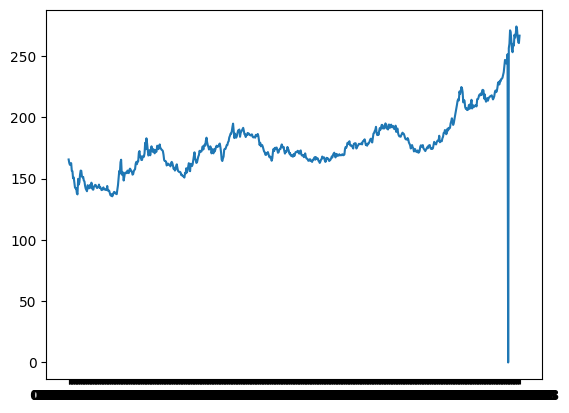

In [5]:
#график начальных данных - зависимость x от y:
plt.plot(x, y)
plt.show()

In [6]:
df = pd.DataFrame(data) #загоняем в датафрейм

In [7]:
df

,x,y
0,01.01.2016,165.568
1,04.01.2016,162.760
2,05.01.2016,161.200
3,06.01.2016,162.240
4,07.01.2016,162.552
...,...,...
709,25.09.2018,271.752
710,26.09.2018,265.200
711,27.09.2018,261.040
712,28.09.2018,260.520


In [8]:
df.y = (df.y.astype(float).fillna(0.00) + 2 + 260) * 1000 #применяем формулу из задания (дана такая)

In [9]:
df

,x,y
0,01.01.2016,427568.0
1,04.01.2016,424760.0
2,05.01.2016,423200.0
3,06.01.2016,424240.0
4,07.01.2016,424552.0
...,...,...
709,25.09.2018,533752.0
710,26.09.2018,527200.0
711,27.09.2018,523040.0
712,28.09.2018,522520.0


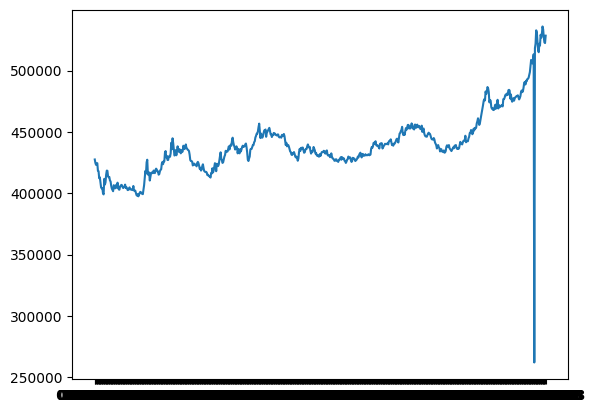

In [10]:
#график данных, вычисленных по формуле из задания - зависимость y от х:
plt.plot(df.x, df.y)
plt.show()

In [11]:
import datetime as dt

#переводим дату в число (столбец "x"), чтобы работала модель линейной регрессии:
df['x'] = pd.to_datetime(data['x'])
df['x']=df['x'].map(dt.datetime.toordinal)
df

C:\Users\Chernyavskaya_OS\AppData\Local\Temp\ipykernel_9504\1051653999.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['x'] = pd.to_datetime(data['x'])


,x,y
0,735964,427568.0
1,736055,424760.0
2,736085,423200.0
3,736116,424240.0
4,736146,424552.0
...,...,...
709,736962,533752.0
710,736963,527200.0
711,736964,523040.0
712,736965,522520.0


In [12]:
from sklearn.model_selection import train_test_split #для разбиения исходной выборки на обучающую и тестовую выборки в соотношении 80%/20%.
X_train, X_test, y_train, y_test = train_test_split(df.x, df.y, test_size=0.2, shuffle=False)#80/20 80% - это тренировочные данные, 20% - тестовые

In [13]:
#преобразуем столбец х: вместо одного массива с числами получаем массив массивов, в каждом подмассиве - по одному значению х: [735964,...,736965,736704]->[[735964],...,[736964],[736964]]
X_train= X_train.values.reshape(-1, 1) 
X_test = X_test.values.reshape(-1, 1)

In [14]:
model_LR = LinearRegression().fit(X_train, y_train) #строим модель линейной регрессии и обучаем её на тренировочных данных (обучение - команда .fit, тренировочные данные - это массивы X_train и y_train, т.е. 80% от исходных данных в файле, т.е. дата(х)+цена(у))

In [15]:
#формируем массив тестовых данных
import datetime

#получаем новый массив дат - период 01.10.2018 - 31.03.2019, только будни (пн-пт), без выходных (сб-вс)
date_array = [] #в этом массиве будут храниться данные в формате даты (т.е. дата = дата)
date = datetime.datetime(2018,10,1)
while date <= datetime.datetime(2019,4,1):
    if date.weekday() != 5 and date.weekday() != 6:
        date_array.append(date)
        date += datetime.timedelta(days=1)
    else:
        date += datetime.timedelta(days=2)

df_test_z = pd.DataFrame() #заводим новую оболочку под х и расчётный у (y - это искомая цена)
df_test_z['x'] = pd.to_datetime(date_array) #загоняем в df_test_z['x'] массив дат искомого периода в родном формате даты
df_test_z['x'] = df_test_z['x'].map(dt.datetime.toordinal) #преобразуем эти даты в числа, чтобы работала модель линейной регрессии


In [16]:
df_test_z['x'] #тут можно просто посмотреть на даты, преобразованные в числа (это всё - период 01.10.2018 - 31.03.2019)

0      736968
1      736969
2      736970
3      736971
4      736972
        ...  
126    737144
127    737145
128    737146
129    737147
130    737150
Name: x, Length: 131, dtype: int64

In [17]:
X_test = df_test_z['x'] #просто для соблюдения чистоты нотаций
X_test = X_test.values.reshape(-1, 1) #преобразуем столбец х: вместо одного массива с числами получаем массив массивов, в каждом подмассиве - по одному значению х: [735968,...,737147,737150]->[[735968],...,[737147],[737150]]

In [18]:
prediction = model_LR.predict(X_test) #прогоняем нашу модель линейной регрессии для нового периода (01.10.2018 - 31.03.2019) - получаем прогнозные значения y
df_test_z = pd.DataFrame() #обнуляем датафрейм для хранения результатов прогнозирования
df_test_z["Дата"] = pd.DataFrame(date_array) #подставляем даты вместо эквивалентных им чисел
df_test_z["Стоимость 1 блока товаров"] = prediction #добавляем в наш набор данных (НД) расчетное значение y - загоняем его в результирующий датафрейм
df_test_z["Цена товара"] = df_test_z["Стоимость 1 блока товаров"].astype(float).fillna(0.00)/1000 - 260 - 2 #применяем формулу из задания

df_test_z #просто выведем на экран, чтобы посмотреть 

,Дата,Стоимость 1 блока товаров,Цена товара
0,2018-10-01,453170.059581,191.170060
1,2018-10-02,453206.487145,191.206487
2,2018-10-03,453242.914710,191.242915
3,2018-10-04,453279.342274,191.279342
4,2018-10-05,453315.769839,191.315770
...,...,...,...
126,2019-03-26,459581.310955,197.581311
127,2019-03-27,459617.738520,197.617739
128,2019-03-28,459654.166084,197.654166
129,2019-03-29,459690.593649,197.690594


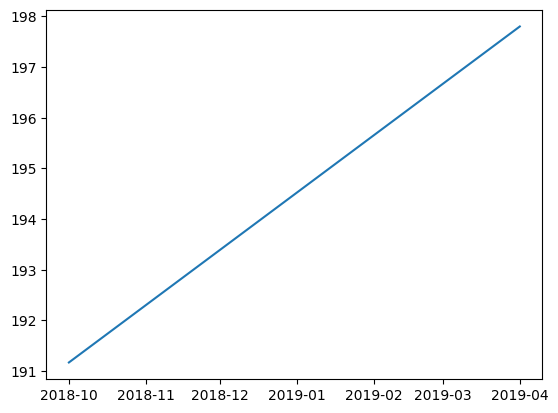

In [19]:
#график для преиода 01.10.2018-31.03.2019 (это ось х), по оси у - цена товара
plt.plot(df_test_z["Дата"], df_test_z["Цена товара"])
plt.show()

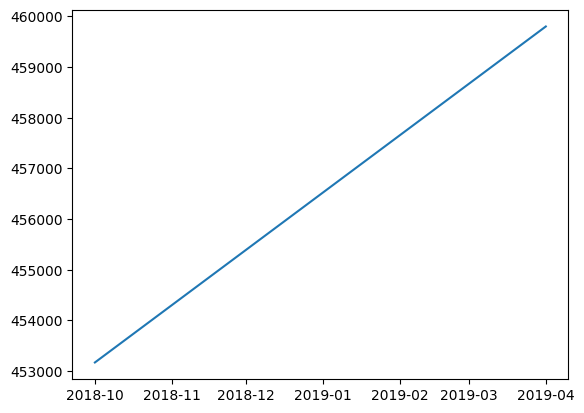

In [20]:
#график для преиода 01.10.2018-31.03.2019 (это ось х), по оси у - стоимость 1 блока товаров
plt.plot(df_test_z["Дата"], df_test_z["Стоимость 1 блока товаров"])
plt.show()

In [21]:
#считаем сумму (полную стоимость контракта):
s = pd.Series(df_test_z["Стоимость 1 блока товаров"]).sum()

In [22]:
#пишем в файл результаты:
#в первом столбце из датафрейма df_test_z - хранится дата из периода 01.10.2018 - 31.03.2019, во втором столбце - хранится прогнозное значение для 1 блока товаров, в третьем столбце - цена одной единицы товара (т.е. единица измерения как в исходных данных - применим формулу из задания наоборот)
df_test_z.to_csv("data_prediction_model_LR_task1.csv", index=False, encoding='utf-8-sig')
print("Результаты прогноза модели, построенной методом линейной регрессии выгружены в файл data_prediction_model_LR_task1.csv")
print("Файл хранится в той же папке, откуда запускается эта IDE")
print("Полная стоимость договора, у.е.: {f}".format (f = s))

Результаты прогноза модели, построенной методом линейной регрессии выгружены в файл data_prediction_model_LR_task1.csv
Файл хранится в той же папке, откуда запускается эта IDE
Полная стоимость договора, у.е.: 59795742.33626709
